<a href="https://colab.research.google.com/github/Micasaccone/ProyectoDS_ParteI_-Saccone/blob/main/ProyectoDS_ParteI_%2BSaccone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Base de datos campaña de ventas - marzo 2024**

*  El objetivo es poder analizar la campaña ya efectuada para poder optimizar la publicidad digital de las próximas campañas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df= pd.read_excel('/content/BASE DE DATOS VENTAS (1).xlsx')
df.head()

,ID de venta,Género,Edad,Producto,Precio Unitario,Cantidad,Precio Total,Canal de Compra,Ciudad,Fecha de Compra,Tipo de Entrega,Modalidad de Pago,Estado de la venta,Validación en Atención,Tipo de cliente
0,2889.0,F,19.0,Crema hidratante facial,47500.0,1.0,47500.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,Poco Satisfactoria,Nuevo
1,2890.0,F,40.0,Lápiz labial,3269.0,5.0,16345.0,Contact Center,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Transferencia,Buena,Recurrente
2,2891.0,F,44.0,Crema hidratante facial,47500.0,5.0,237500.0,Web Comex,Provincia de Buenos Aires,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Efectivo,Buena,Recurrente
3,2892.0,F,27.0,Lápiz labial,3269.0,1.0,3269.0,Web Comex,Provincia de Buenos Aires,2024-03-08,Envío a domicilio,Tarjeta de Crédito (6 Cuotas),Pendiente Entrega,Buena,Nuevo
4,2893.0,F,50.0,Crema hidratante facial,47500.0,1.0,47500.0,Web Comex,CABA,2024-03-02,Envío a domicilio,Tarjeta de Crédito (3 Cuotas),Pendiente Entrega,Buena,Recurrente


**¿Cuál es la cantidad de productos vendidos según el género?**

In [8]:
product_names = ('Crema hidratante facial','Bronceador en polvo','Corrector facial','Lápiz labial','Base de maquillaje líquida','Perfume','Sombra de ojos','Limpiador facial','Máscara de pestañas','Esmalte de uñas')
product_count = df.groupby(['Producto', 'Género']).size().reset_index(name='Count')
fig = px.bar(product_count, x='Producto', y='Count', color='Género', title='¿Cuál es la cantidad de productos vendidos según el género?')
fig.update_xaxes(title='Clase')
fig.update_yaxes(title='Cantidad')
fig.show()

*Podemos observar que se encuentra con una buena distribución la cantidad de productos comprados indiferentemente del sexo de la persona, por ende no es necesario modificar la estructura en nuestra campaña. Podemos sólo para potenciar un nivel mas la campaña redireccipnar al público femenino ya que en porcentaje tienen un poco mas de compras. Podemos identificar que el producto mejor vendido es la "Crema Hidratante", podemos direccionar nuestra publicidad hacia ese producto o armar combos que lo incluyan con nuestros otros productos.
También podemos armar combos con nuestros productos menos vendidos para potenciarlos.*

**2- ¿Cuál es la provincia con mayor cantidad de ventas?**

In [ ]:
conteo_Provincia = df['Ciudad'].value_counts()
fig = px.pie(values=conteo_Provincia,
             title="¿Cuál es la provincia con mayor cantidad de ventas?",
             names=conteo_Provincia.index)
fig.update_traces(textinfo='percent+label')

*Podemos observar que el mayor porcentaje de ventas se encuentra entre CABA y Provincia de Buenos Aires, por lo cuál recomendamos segmentar la publicidad en esa zona geográfica. También podemos sumar Córdoba ya que cuenta con un gran porcentaje
En caso de querer potenciar en las provincias restantes, recomendaría analizar costos y beneficios por invertir dinero en publicidad en esas localidades.*

**3- ¿Cuál es la distribución de compras a lo largo del mes, diferenciado por género?**

In [10]:
df['Fecha de Compra'] = pd.to_datetime(df['Fecha de Compra'])

In [9]:
compras_por_fecha = df.groupby('Fecha de Compra').size()

In [11]:
fig = px.histogram(df, x='Fecha de Compra',y= 'Precio Total', color='Género', title='Histograma de Edades')
fig.update_xaxes(title='Fecha de Compra')
fig.update_yaxes(title='Precio Total')
fig.show()

*Podemos verificar que los picos de compra se dan los fines de semana, por ese motivo, aconsejamos ampliar la pauta en esas fechas. Es bastante parecida la media de compra de ambos géneros, podemos pensar en el armado de combos o campañas para fechas en específico a fin de potenciar la venta de ciertos productos (Día de la madre, Navidad, etc)  .*

**4- ¿Cuál es el promedio de compra según género y tipo de cliente?**

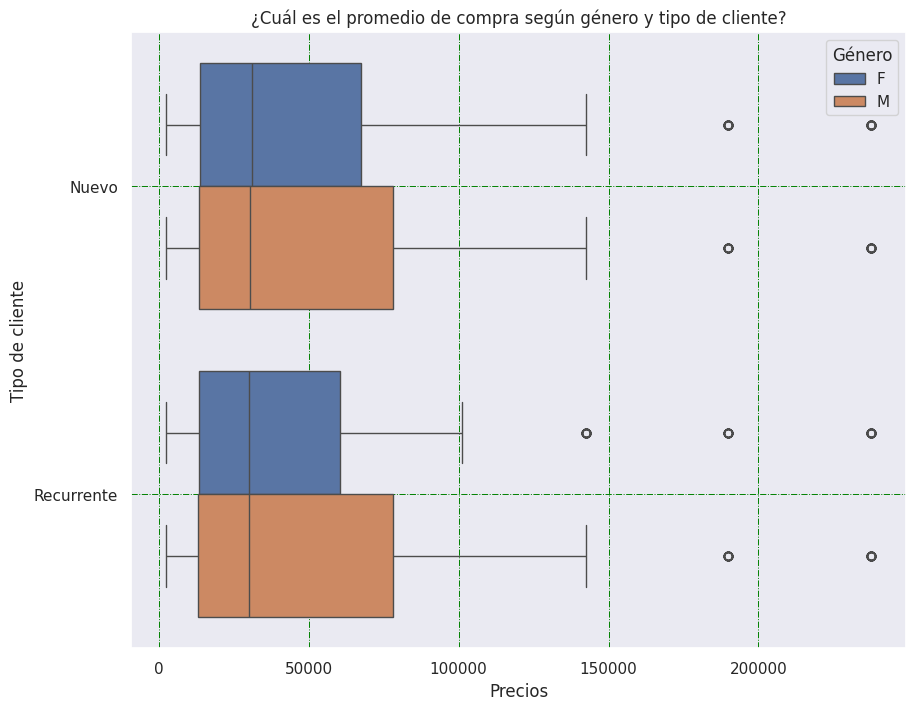

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Precio Total", y= 'Tipo de cliente', hue= 'Género', data=df)
plt.grid(True)
plt.grid(color='green', linestyle='-.', linewidth=0.7)
plt.title('¿Cuál es el promedio de compra según género y tipo de cliente?')
plt.xlabel('Precios')
plt.show()

*Verificamos que la mayoria de nuestras compras se encuentran dentro de los 10.000 a 60.000. Existen solo dos valores outliers, salvo en el caso de los clientes recurrentes y femeninos que hay uno más. Podríamos potenciar las campañas para que los productos se compren en cantidades asi poder variar la media un poco más arriba.
Podemos tambien indicar que las medias no varian segun el tipo de cliente.
Podemos verificar que la media dentro del género masculino es mas amplia que en el género femenino*